In [56]:
import pandas as pd
import requests, zipfile, StringIO
pd.set_option('display.max_columns',200)
import numpy as np
import grequests
import matplotlib.pyplot as plt
%matplotlib inline

# ACS Data

In [7]:
acs5yr_base = 'https://www2.census.gov/programs-surveys/acs/data/pums/2016/5-Year/'

In [8]:
def pull_acsfile(state, filetype='csv', ph='p'):
    r = requests.get(
        acs5yr_base + '{filetype}_{ph}{state}.zip'.format(filetype=filetype,
                                                          ph=ph,
                                                          state=state),
            stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall()

In [9]:
statelist = ['il','ca','ny']

In [38]:
for state in statelist:
    print('{} Started'.format(state))
    pull_acsfile(state)
    print('{} Complete'.format(state))

il Started
il Complete
ca Started
ca Complete
ny Started
ny Complete


# Zip Code Population Data

In [3]:
# r = requests.get('https://www.kaggle.com/census/us-population-by-zip-code/downloads/us-population-by-zip-code.zip', stream=True)
# z = zipfile.ZipFile(StringIO.StringIO(r.content))
# z.extractall()

pop location
https://www.kaggle.com/census/us-population-by-zip-code/downloads/us-population-by-zip-code.zip

In [60]:
df = pd.read_csv('ss16pca.csv')

In [61]:
df.head()

,RT,SERIALNO,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTR,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPI,MLPJ,MLPK,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKW,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,...,FPOBP,FPOWSP,FPRIVCOVP,FPUBCOVP,FRACP,FRELP,FRETP,FSCHGP,FSCHLP,FSCHP,FSEMP,FSEXP,FSSIP,FSSP,FWAGP,FWKHP,FWKLP,FWKWP,FWRKP,FYOEP,PWGTP1,PWGTP2,PWGTP3,PWGTP4,PWGTP5,PWGTP6,PWGTP7,PWGTP8,PWGTP9,PWGTP10,PWGTP11,PWGTP12,PWGTP13,PWGTP14,PWGTP15,PWGTP16,PWGTP17,PWGTP18,PWGTP19,PWGTP20,PWGTP21,PWGTP22,PWGTP23,PWGTP24,PWGTP25,PWGTP26,PWGTP27,PWGTP28,PWGTP29,PWGTP30,PWGTP31,PWGTP32,PWGTP33,PWGTP34,PWGTP35,PWGTP36,PWGTP37,PWGTP38,PWGTP39,PWGTP40,PWGTP41,PWGTP42,PWGTP43,PWGTP44,PWGTP45,PWGTP46,PWGTP47,PWGTP48,PWGTP49,PWGTP50,PWGTP51,PWGTP52,PWGTP53,PWGTP54,PWGTP55,PWGTP56,PWGTP57,PWGTP58,PWGTP59,PWGTP60,PWGTP61,PWGTP62,PWGTP63,PWGTP64,PWGTP65,PWGTP66,PWGTP67,PWGTP68,PWGTP69,PWGTP70,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2012000000011,1,8508,6,1056030,21,63,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,2.0,2.0,NaN,NaN,2.0,NaN,NaN,1,2,2,2,2,2,2,0.0,30.0,1.0,1.0,2.0,1,2.0,2.0,1.0,2.0,1976.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0,0.0,1.0,NaN,19.0,0.0,1,0.0,0.0,65000.0,40.0,1.0,1.0,1.0,NaN,2,32,50,NaN,2,1.0,NaN,1.0,NaN,NaN,1,1,1190.0,46.0,10.0,NaN,NaN,NaN,1.0,311811,1,NaN,0,9130.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,6,38,21,22,23,34,22,7,21,38,38,22,22,35,7,19,6,7,22,22,34,7,19,22,23,7,21,38,21,5,7,22,22,7,36,22,37,38,25,22,38,6,22,22,23,6,21,33,22,6,7,21,22,7,37,21,40,37,23,20,5,41,21,24,22,38,21,7,22,37,38,23,22,35,6,23,7,7,22
1,P,2012000000011,2,8508,6,1056030,22,60,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1,2,2,2,2,2,2,0.0,10.0,1.0,1.0,2.0,1,2.0,2.0,1.0,2.0,1976.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,1,0.0,1.0,NaN,19.0,0.0,2,0.0,0.0,40000.0,40.0,1.0,1.0,1.0,NaN,2,32,50,NaN,2,1.0,NaN,1.0,NaN,NaN,1,1,7070.0,102.0,61.0,NaN,NaN,NaN,1.0,531,1,NaN,0,5700.0,4.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,7,40,22,22,24,35,22,6,21,38,39,21,22,38,7,21,7,6,22,22,33,7,22,24,21,6,23,37,22,7,8,22,23,6,37,24,38,41,25,23,39,6,21,22,23,6,23,34,24,7,7,21,24,7,43,22,41,39,23,21,6,43,22,22,23,37,21,7,23,42,36,24,22,33,6,23,6,6,22
2,P,2012000000022,1,8105,6,1056030,14,79,1,NaN,NaN,2.0,1,2,2.0,2.0,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,2,2,1,2,2,2,2,0.0,NaN,NaN,NaN,1.0,2,2.0,2.0,1.0,2.0,1969.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,2.0,2.0,3.0,0.0,0.0,0,18000.0,1.0,NaN,16.0,0.0,2,0.0,21600.0,0.0,NaN,3.0,NaN,2.0,NaN,1,51,999,NaN,1,NaN,NaN,6.0,NaN,NaN,1,1,NaN,NaN,NaN,1155.0,NaN,NaN,3.0,NaN,1,NaN,0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,4,13,23,23,25,13,14,14,14,13,4,4,4,13,22,14,4,13,23,15,4,16,25,23,23,13,15,14,16,15,4,4,4,14,27,15,4,15,5,16,21,15,5,4,5,14,14,14,14,14,25,25,22,14,4,14,22,15,4,15,24,15,4,3,4,15,15,15,14,14,25,22,22,14,4,14,23,13,25
3,P,2012000000031,1,1305,6,1056030,20,49,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1,2,2,2,2,2,2,0.0,60.0,1.0,1.0,2.0,1,2.0,2.0,1.0,2.0,1983.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0,0.0,1.0,NaN,21.0,0.0,1,0.0,0.0,69000.0,60.0,1.0,1.0,1.0,NaN,1,210,999,NaN,2,1.0,NaN,1.0,2414.0,NaN,1,2,4670.0,94.0,43.0,NaN,NaN,NaN,1.0,4411,1,NaN,0,4700.0,NaN,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,21,20,29,31,27,14,39,5,33,5,17,6,5,22,22,18,31,17,19,19,31,6,7,29,22,27,20,18,20,25,27,18,24,5,6,33,47,4,7,34,15,18,28,6,7,19,5,30,5,37,19,27,34,22,20,18,25,22,20,16,4,39,36,19,16,5,23,17,22,20,5,21,21,37,39,6,7,30,30
4,P,2012000000031,2,1305,6,1056030,19,48,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,1,2,2

(array([18841., 19768., 20403., 20924., 21350., 22221., 22505., 22965.,
        23203., 23036., 23104., 23122., 23288., 23757., 23748., 24561.,
        25542., 26095., 27655., 26004., 25438., 24706., 24919., 24811.,
        24566., 24909., 24245., 23917., 24042., 23668., 25680., 23803.,
        24618., 23798., 23893., 24155., 23238., 22716., 22885., 22551.,
        24490., 23033., 24174., 24292., 24465., 25745., 24333., 24340.,
        24939., 25293., 28014., 26131., 26923., 26463., 26396., 27325.,
        26436., 25650., 25880., 24851., 25562., 23442., 23127., 22299.,
        21624., 22079., 20122., 19362., 17993., 16894., 15852., 14337.,
        13662., 12888., 11706., 11392., 10495., 10025.,  9363.,  8544.,
         8585.,  7887.,  7489.,  7028.,  6618.,  6068.,  5536.,  4912.,
         4479.,  3857.,  2835.,     0.,     0., 13096.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
    

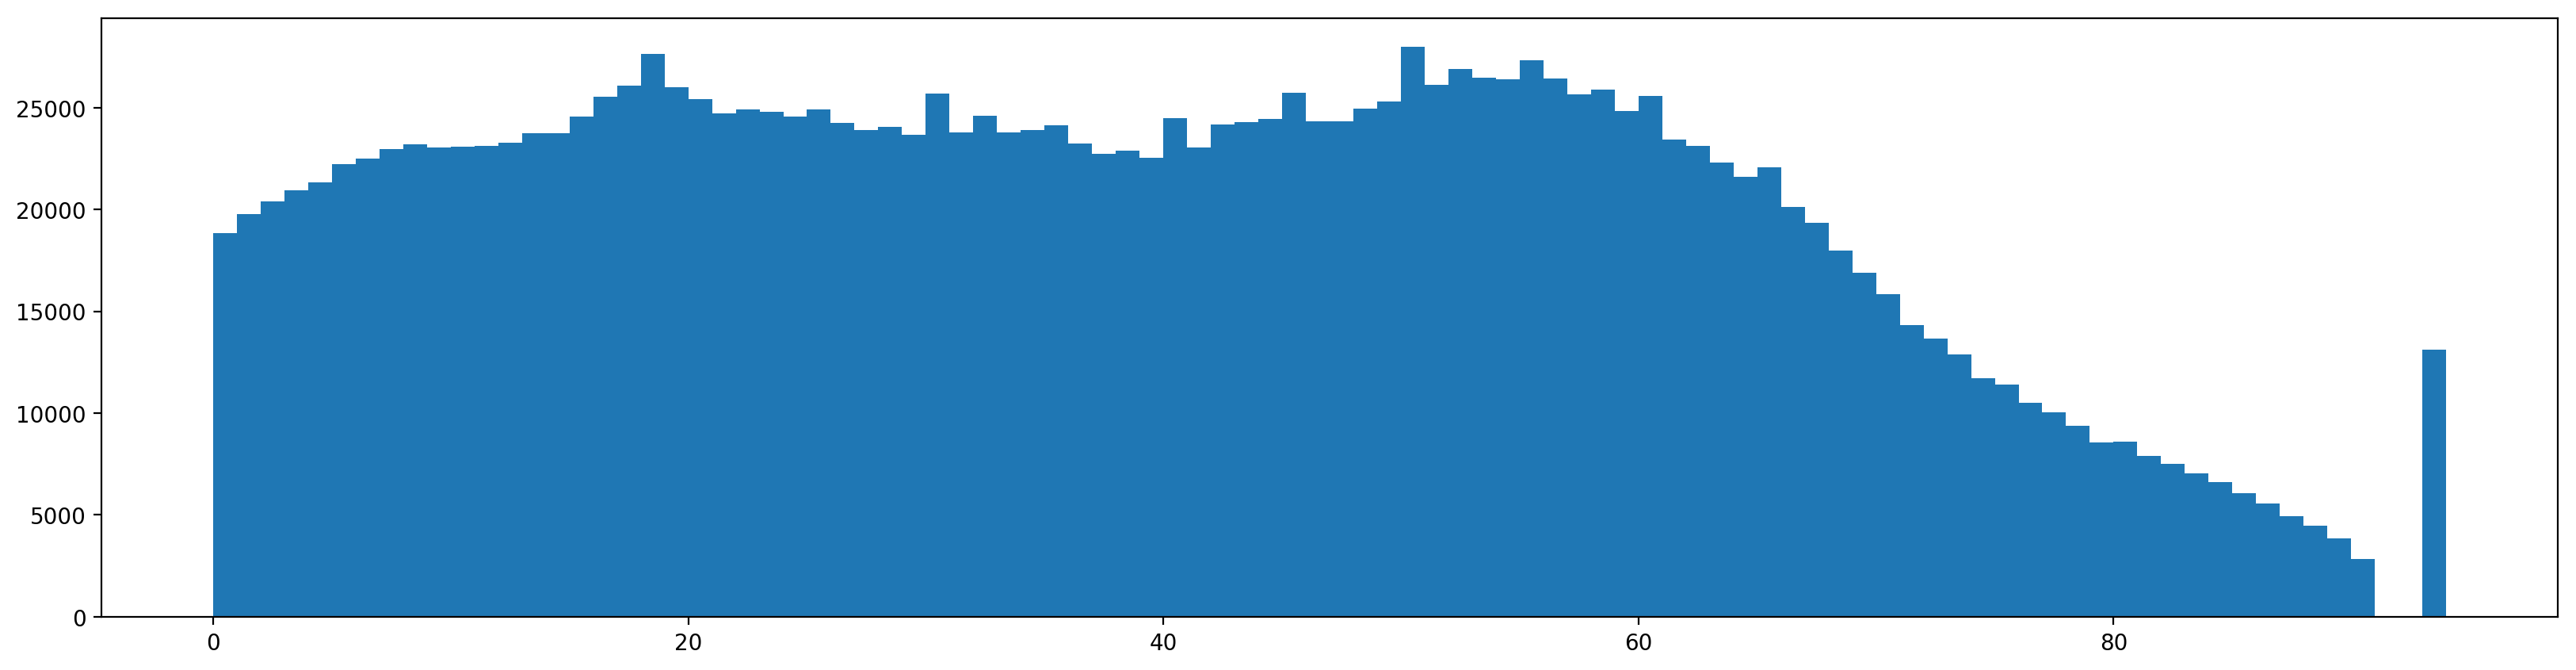

In [73]:
fig, ax = plt.subplots(figsize=(20,5), dpi=200)
ax.hist(df['AGEP'],bins=94)

In [83]:
age_wage = df.dropna(subset=['AGEP','WAGP']).groupby('AGEP').agg({'WAGP':'mean'})

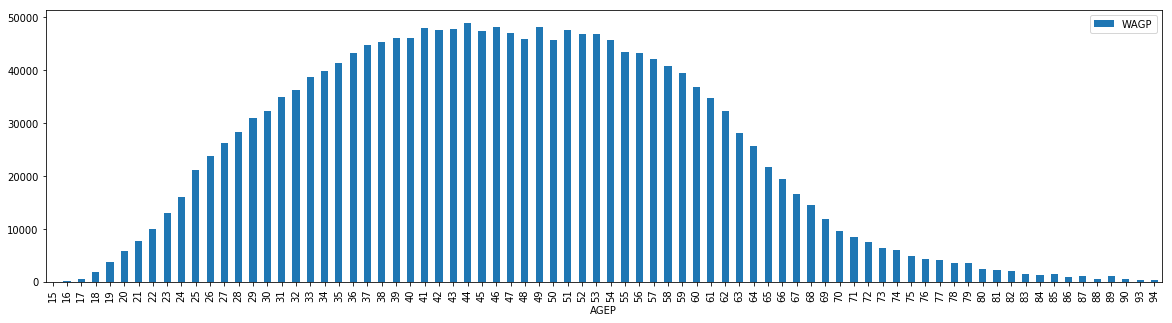

In [84]:
age_wage.plot(kind='bar',figsize=(20,5))

# BART Locations

In [10]:
from lxml import html

In [11]:
r = requests.get('https://www.bart.gov/stations')

In [12]:
tree = htmltree = html.fromstring(r.content)
t = tree.xpath('//*[@id="station-lists"]/ul/li/a')

In [13]:
stations = []
for list_obj in t:
#     try:
    station_url = list_obj.items()[0][1]
    stations.append(station_url)
#     except:
#         pass

In [14]:
zipcodes = []
station_addrs = []
for sta_url in stations:
    full_url = 'https://www.bart.gov' + sta_url
    sta_r = requests.get(full_url)
    tree = htmltree = html.fromstring(sta_r.content)
    address = tree.xpath('//*[@id="main-content"]/div[1]/div/span[1]/text()')[0]
    city = tree.xpath('//*[@id="main-content"]/div[1]/div/span[2]/text()')[0]
    zipcode = tree.xpath('//*[@id="main-content"]/div[1]/div/span[4]/text()')[0]
    zipcodes.append(zipcode)
    station_addrs.append('{}, {}, CA, {}'.format(address,city,zipcode))

In [52]:
def get_latlon(address):
    address = address.replace(' ','+').strip("'")
    response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={}, CA'.format(address))
    resp_json_payload = response.json()
    try:
        return resp_json_payload['results'][0]['geometry']['location']
    except:
        try:
            response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={}, CA'.format(address))
            resp_json_payload = response.json()
            return resp_json_payload['results'][0]['geometry']['location']
        except:
            return address #resp_json_payload['results']

In [53]:
stations_ = {}
for add_ in station_addrs:
    payload = get_latlon(add_)
    stations_.update({add_:payload})

In [54]:
stations_2=[]
for stat, loc_ in stations_.items():
    try:
        lat, lng = loc_['lat'], loc_['lng']
    except:
        lat, lng = np.nan, np.nan
    stations_2.append({'station':stat,
                       'latatude':lat,
                       'longitude':lng,
                       'raw':loc_})

In [59]:
sta_loc_df.to_csv('station_locations.csv')

# ASYNC running